# Word Embeddings of Alphabetic Data

**Creating the embeddings of unaugmented alphabetic dataset**

The corpus [(http://rapanui.polycorpora.org/)](http://rapanui.polycorpora.org/) consists of four texts full of folklore, which is likely more similar to the semantic content of the tablets than other more modern texts which include loanwords and anachronisms like America and electricity.

In [ ]:
from gensim.models import Word2Vec
from google.colab import drive

drive.mount('/content/drive')
rawRN = open('/content/drive/My Drive/rn_raw.txt', 'r')

In [ ]:
import io
df = rawRN.readlines()

In [ ]:
from gensim.models.phrases import Phrases, Phraser

line = [row.split() for row in df]
phrases = Phrases(line, min_count=10,threshold=1)
lines = phrases[line]

Create the model for alphabetic dataset. The parameters are same for the unaugmented and augmented datasets.

In [ ]:
import logging
import cython

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
modelRN2 = Word2Vec(min_count=3,window=5,size=300,sample=0.001,alpha=0.01,min_alpha=0.0005,negative=10,workers=4,sg=1)

In [ ]:
modelRN2.build_vocab(lines)

In [ ]:
modelRN2.train(lines,total_examples=modelRN2.corpus_count,epochs=150,report_delay=10)

**Create model for augmented dataset**

The original dataset has been expanded by ~3 times with a thesaurus to make up for the small amount of available text. 

In [ ]:
augRN = open('/content/drive/My Drive/rn_aug.txt','r')
df2 = augRN.readlines()
line2 = [row.split() for row in df2]
phrases2 = Phrases(line2, min_count=10,threshold=1)
lines2 = phrases2[line2]
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
modelRN3 = Word2Vec(min_count=3,window=5,size=300,sample=0.001,alpha=0.01,min_alpha=0.0005,negative=10,workers=4,sg=1)

In [ ]:
modelRN3.build_vocab(lines2)

In [ ]:
modelRN3.train(lines2,total_examples=modelRN3.corpus_count,epochs=150,report_delay=10)

In [ ]:
print(modelRN2.wv.most_similar('poki'))
print(modelRN3.wv.most_similar('poki')) # Compare embeddings trained on unaugmented vs augmented data

In [ ]:
# tSNE visualization
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np

def twoD(model):
    vectors = []
    labels = []
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=2, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x = [v[0] for v in vectors]
    y = [v[1] for v in vectors]
    return x, y, labels

def plot(model):
    import matplotlib.pyplot as plt
    import random

    x, y, labels = twoD(model)
    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x, y)


In [ ]:
from google.colab import files

modelRN2.save('model_rn_unaugmented.txt')
modelRN3.save('model_rn_augmented.txt')

files.download('model_rn_unaugmented.txt')
files.download('model_rn_augmented.txt') # Save the word embeddings

# Character n-Gram Embeddings of Alphabetic Data

**Generating character embeddings of alphabetic texts**

The vocabulary of the tablets and books don't totally overlap, and character-based embeddings can capture subwords that appear in rare and unseen words. The character embedding model is trained on the augmented dataset.

In [ ]:
from gensim.models import FastText
modelRNAC = FastText(min_count=3,window=5,size=300,sample=0.001,alpha=0.01,min_alpha=0.0005,workers=4,sg=1,negative=10,word_ngrams=1)

In [ ]:
modelRNAC.build_vocab(lines2)

In [ ]:
modelRNAC.train(lines2,total_examples=modelRNAC.corpus_count,epochs=150,report_delay=10)

2020-06-12 14:05:38,917 : INFO : training model with 4 workers on 1593 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=10 window=5
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-12 14:05:39,997 : INFO : EPOCH 1 - PROGRESS: at 48.89% examples, 32987 words/s, in_qsize 0, out_qsize 0
2020-06-12 14:05:40,479 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-12 14:05:40,529 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-12 14:05:40,559 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-12 14:05:40,676 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-12 14:05:40,679 : INFO : EPOCH - 1 : training on 110835 raw words (66782 effective words) took 1.7s, 38208 effective wo

In [ ]:
modelRNAC.most_similar(positive=['tagata_manu'],negative=['manu'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tagata', 0.1927449256181717),
 ('tagata_nanagi', 0.14031901955604553),
 ('tagata_nei', 0.1333101987838745),
 ('tagata_vere', 0.10751266032457352),
 ('haoa_mo', 0.08644724637269974),
 ('to', 0.08315013349056244),
 ('kiruga', 0.08204388618469238),
 ('ka_iri', 0.07737887650728226),
 ('ka_moe', 0.06325247138738632),
 ('tetea', 0.060792095959186554)]

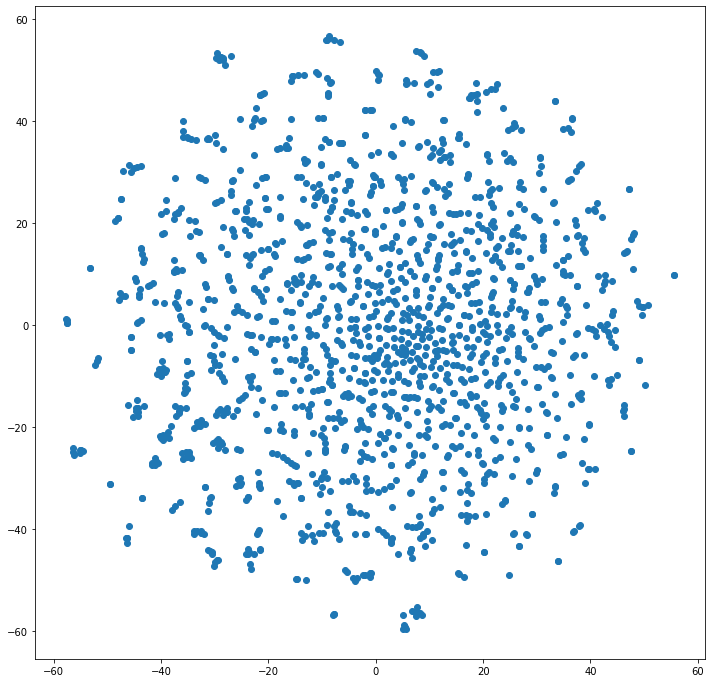

In [ ]:
plot(modelRNAC)

In [ ]:
modelRNAC.save('model_rn_ac.txt')
files.download('model_rn_ac.txt')

2020-06-12 14:15:28,546 : INFO : saving FastText object under model_rn_ac.txt, separately None
2020-06-12 14:15:28,548 : INFO : not storing attribute vectors_norm
2020-06-12 14:15:28,549 : INFO : not storing attribute vectors_vocab_norm
2020-06-12 14:15:28,552 : INFO : not storing attribute vectors_ngrams_norm
2020-06-12 14:15:28,553 : INFO : not storing attribute buckets_word
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-06-12 14:15:29,069 : INFO : saved model_rn_ac.txt


# Character n-Gram Embeddings of Tablet Data

**Generating character embeddings of tablet**

The ~15000-character corpus [(kohaumotu.org)](https://kohaumotu.org) is analyzed for character and frequent n-gram embeddings up to n = 5. Because the meaning of all characters are unknown, no data augmentation is performed in order to preserve the integrity of the grammar.

In [ ]:
RR = open('/content/drive/My Drive/rn_aug_syl.txt','r')
df3 = RR.readlines()
tablet = [row.split() for row in df3]
bigram = Phrases(tablet, min_count=10,threshold=1)
trigram = Phrases(bigram[tablet], min_count=5,threshold=1)
tetragram = Phrases(trigram[bigram[tablet]], min_count=3,threshold=1)
pentagram = Phrases(tetragram[trigram[bigram[tablet]]], min_count=1,threshold=1)
tablets = pentagram[tetragram[trigram[bigram[tablet]]]]

2020-06-16 17:12:37,108 : INFO : collecting all words and their counts
2020-06-16 17:12:37,109 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-16 17:12:37,443 : INFO : PROGRESS: at sentence #10000, processed 252178 words and 2357 word types
2020-06-16 17:12:37,450 : INFO : collected 2357 word types from a corpus of 256980 words (unigram + bigrams) and 10119 sentences
2020-06-16 17:12:37,451 : INFO : using 2357 counts as vocab in Phrases<0 vocab, min_count=10, threshold=1, max_vocab_size=40000000>
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-16 17:12:37,453 : INFO : collecting all words and their counts
2020-06-16 17:12:37,455 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-16 17:12:38,757 : INFO : PROGRESS: at sentence #

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
modelRR = Word2Vec(min_count=3,window=5,size=300,sample=0.1,alpha=0.01,min_alpha=0.0005,negative=20,workers=4,sg=1)

In [ ]:
modelRR.build_vocab(tablets)

2020-06-16 17:13:22,674 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-16 17:13:22,676 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-16 17:13:26,527 : INFO : PROGRESS: at sentence #10000, processed 251079 words, keeping 151 word types
2020-06-16 17:13:26,612 : INFO : collected 151 word types from a corpus of 255873 raw words and 10119 sentences
2020-06-16 17:13:26,613 : INFO : Loading a fresh vocabulary
2020-06-16 17:13:26,615 : INFO : effective_min_count=3 retains 99 unique words (65% of original 151, drops 52)
2020-06-16 17:13:26,616 : INFO : effective_min_count=3 leaves 255813 word corpus (99% of original 255873, drops 60)
2020-06-16 17:13:26,618 : INFO : deleting the raw counts dictionary of 151

In [ ]:
modelRR.train(tablets,total_examples=modelRR.corpus_count,epochs=150,report_delay=10)

2020-06-16 17:13:36,933 : INFO : training model with 4 workers on 99 vocabulary and 300 features, using sg=1 hs=0 sample=0.1 negative=20 window=5
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-16 17:13:38,219 : INFO : EPOCH 1 - PROGRESS: at 14.31% examples, 23537 words/s, in_qsize 0, out_qsize 0
2020-06-16 17:13:45,468 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-16 17:13:45,472 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-16 17:13:45,652 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-16 17:13:45,702 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-16 17:13:45,703 : INFO : EPOCH - 1 : training on 255873 raw words (255813 effective words) took 8.8s, 29218 effective words

(38371950, 38380950)

In [ ]:
modelRR.wv.most_similar('po_ki') # Test character n-gram embeddings

KeyError: ignored

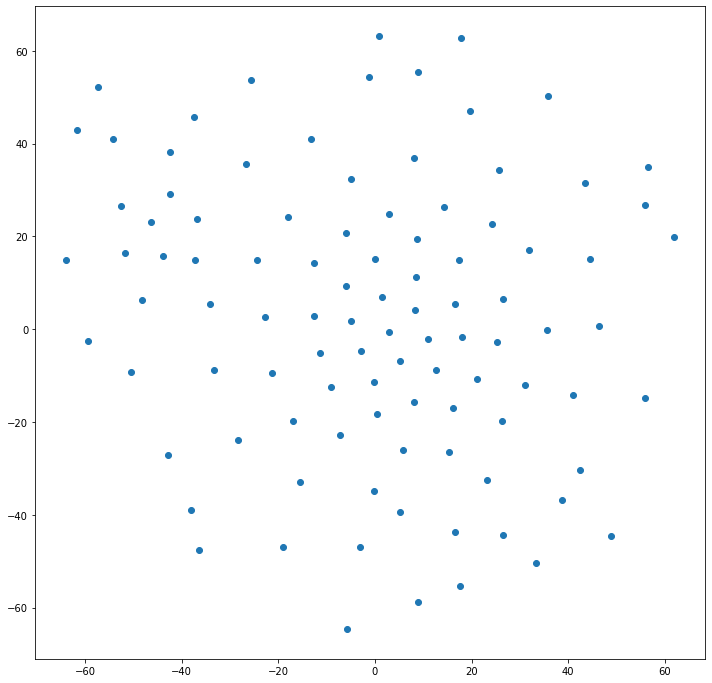

In [ ]:
plot(modelRR)

In [ ]:
modelRR.save('model_rr.txt')
files.download('model_rr.txt') # Save character embeddings

2020-06-12 14:23:34,180 : INFO : saving Word2Vec object under model_rr.txt, separately None
2020-06-12 14:23:34,181 : INFO : not storing attribute vectors_norm
2020-06-12 14:23:34,184 : INFO : not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-06-12 14:23:34,221 : INFO : saved model_rr.txt


Testing FastText with character embeddings

In [ ]:
modelRRFT = FastText(min_count=3,window=5,size=300,sample=0.001,alpha=0.01,min_alpha=0.0005,workers=4,sg=1,negative=10,word_ngrams=1)

In [ ]:
modelRRFT.build_vocab(tablets)

2020-06-12 14:49:03,156 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-12 14:49:03,171 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-12 14:49:03,217 : INFO : collected 1683 word types from a corpus of 10687 raw words and 26 sentences
2020-06-12 14:49:03,218 : INFO : Loading a fresh vocabulary
2020-06-12 14:49:03,225 : INFO : effective_min_count=3 retains 959 unique words (56% of original 1683, drops 724)
2020-06-12 14:49:03,226 : INFO : effective_min_count=3 leaves 9408 word corpus (88% of original 10687, drops 1279)
2020-06-12 14:49:03,231 : INFO : deleting the raw counts dictionary of 1683 items
2020-06-12 14:49:03,232 : INFO : sample=0.001 downsamples 79 most-common words
2020-06-12 14:49:03,233 

In [ ]:
modelRRFT.train(tablets,total_examples=modelRR.corpus_count,epochs=150,report_delay=10)

2020-06-12 14:49:06,710 : INFO : training model with 4 workers on 959 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=10 window=5
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-12 14:49:06,771 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-12 14:49:06,779 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-12 14:49:06,803 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-12 14:49:07,001 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-12 14:49:07,002 : INFO : EPOCH - 1 : training on 10687 raw words (8101 effective words) took 0.3s, 28640 effective words/s
2020-06-12 14:49:07,058 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-12 14:49:0

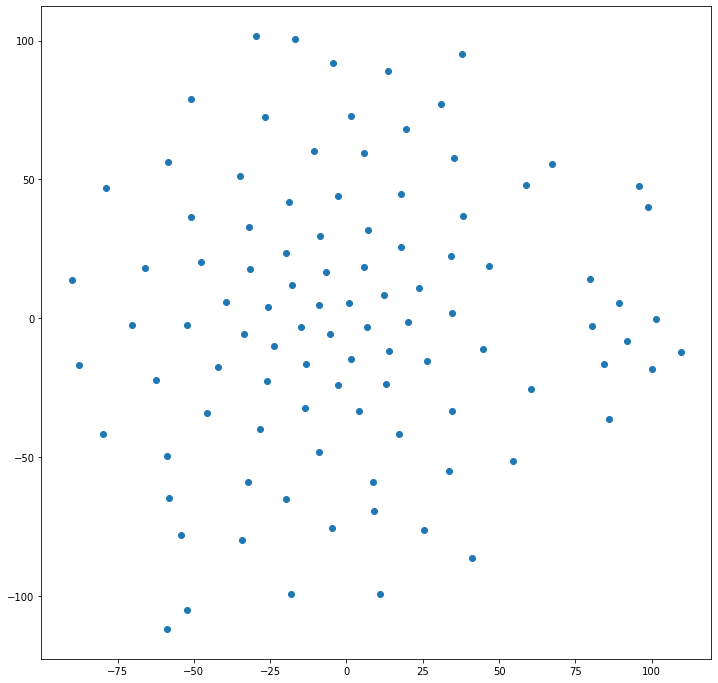

In [ ]:
plot(modelRR)

In [ ]:
modelRR.most_similar('ta_ga')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

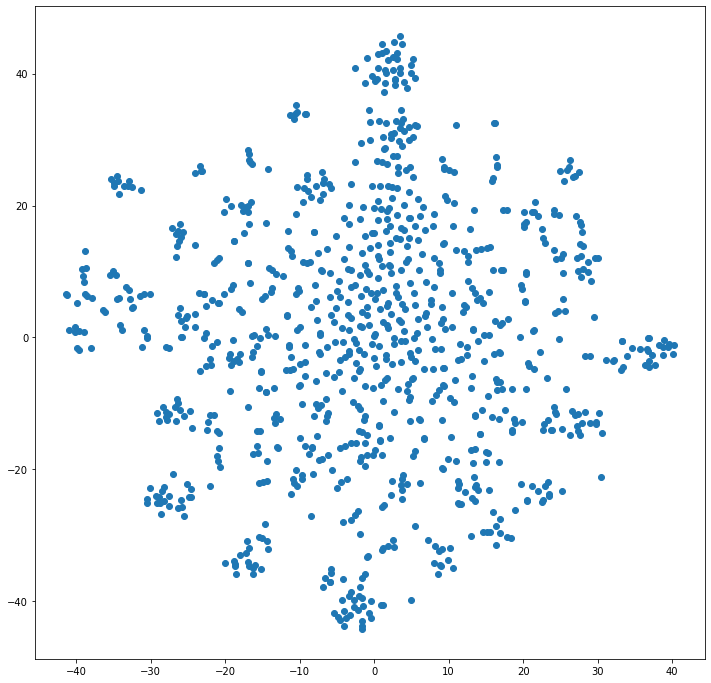

In [ ]:
plot(modelRRFT)

FastText with raw corpus since poses are encoded in higher-number glyphs

In [ ]:
RRR = open('/content/drive/My Drive/rongo_raw.txt','r')
df4 = RRR.readlines()
tablet2 = [row.split() for row in df4]
bigram2 = Phrases(tablet2, min_count=1,threshold=1)
trigram2 = Phrases(bigram[tablet2], min_count=1,threshold=1)
tetragram2 = Phrases(trigram2[tablet2], min_count=1,threshold=1)
pentagram2 = Phrases(tetragram2[tablet2], min_count=1,threshold=1)
tablets2 = pentagram[tablet2]

2020-06-12 14:57:53,114 : INFO : collecting all words and their counts
2020-06-12 14:57:53,115 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-12 14:57:53,143 : INFO : collected 7903 word types from a corpus of 15550 words (unigram + bigrams) and 26 sentences
2020-06-12 14:57:53,145 : INFO : using 7903 counts as vocab in Phrases<0 vocab, min_count=1, threshold=1, max_vocab_size=40000000>
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-12 14:57:53,146 : INFO : collecting all words and their counts
2020-06-12 14:57:53,156 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-12 14:57:53,223 : INFO : collected 9812 word types from a corpus of 12628 words (unigram + bigrams) and 26 sentences
2020-06-12 14:57:53,224 : INFO : using 981

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
modelRRR = Word2Vec(min_count=3,window=5,size=300,sample=0.001,alpha=0.01,min_alpha=0.0005,negative=10,workers=4,sg=1)

In [ ]:
modelRRR.build_vocab(tablets2)

2020-06-12 14:57:57,495 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-12 14:57:57,511 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-12 14:57:57,556 : INFO : collected 1688 word types from a corpus of 10768 raw words and 26 sentences
2020-06-12 14:57:57,557 : INFO : Loading a fresh vocabulary
2020-06-12 14:57:57,564 : INFO : effective_min_count=3 retains 925 unique words (54% of original 1688, drops 763)
2020-06-12 14:57:57,568 : INFO : effective_min_count=3 leaves 9493 word corpus (88% of original 10768, drops 1275)
2020-06-12 14:57:57,573 : INFO : deleting the raw counts dictionary of 1688 items
2020-06-12 14:57:57,576 : INFO : sample=0.001 downsamples 85 most-common words
2020-06-12 14:57:57,578 

In [ ]:
modelRRR.train(tablets2,total_examples=modelRRR.corpus_count,epochs=150,report_delay=10)

2020-06-12 14:58:00,219 : INFO : training model with 4 workers on 925 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=10 window=5
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2020-06-12 14:58:00,278 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-12 14:58:00,282 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-12 14:58:00,301 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-12 14:58:00,415 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-12 14:58:00,417 : INFO : EPOCH - 1 : training on 10768 raw words (8011 effective words) took 0.2s, 42998 effective words/s
2020-06-12 14:58:00,464 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-12 14:58:0

(1198553, 1615200)

In [ ]:
modelRRR.wv.most_similar('202')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('530_040', 0.5522680878639221),
 ('280_200', 0.5255489349365234),
 ('044_004', 0.5151054859161377),
 ('020_064', 0.5116686820983887),
 ('002_070', 0.4900924563407898),
 ('050_050', 0.484711229801178),
 ('548', 0.4800789952278137),
 ('382', 0.467793732881546),
 ('021_001', 0.4403644800186157),
 ('001_670', 0.4296327233314514)]

In [ ]:
modelRR.wv.save_word2vec_format(fname='vectors.txt',fvocab='words.txt')

2020-06-12 22:10:00,839 : INFO : storing vocabulary in words.txt
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-06-12 22:10:00,855 : INFO : storing 959x300 projection weights into vectors.txt


In [ ]:
modelRR.wv.word_vec

TypeError: ignored